In [2]:
import pandas as pd
import seaborn as sns

import pickle

from sklearn.inspection import permutation_importance

RAND = 10
N_REPEATS = 3

In [3]:
metrics = pd.read_csv(r'C:\Users\main6\OneDrive\Документы\jupyter\Pet_pro\data\final_metrics.csv')

In [4]:
# загрузим итоговую таблицу с метриками
metrics.set_index('model').style.highlight_min(axis=0, color='lightpink')

,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
model,,,,,,,,
LinearRegression_baseline,8.347072,156.858720,12.524325,0.455343,0.451267,-inf,inf,34.324438
DecisonTreeRegressor_baseline,10.133774,228.179589,15.105614,0.607437,0.201768,-inf,inf,41.671629
RandomForestRegressor_baseline,8.258138,176.019952,13.267251,0.476677,0.384236,-inf,inf,33.958726
XGBoost_baseline,7.173608,121.679612,11.030848,0.398242,0.574333,-inf,inf,29.498972
LightGBM_baseline,7.120787,122.711309,11.077514,0.393043,0.573203,-inf,inf,29.304653
CatBoost_baseline,6.453979,99.260909,9.962977,0.359331,0.654765,-inf,inf,26.560497
LightGBM_Optuna,6.443470,102.503548,10.124404,0.364783,0.643487,-inf,inf,26.517247
CatBoost_Optuna,6.445009,97.164593,9.857210,0.366083,0.662056,-inf,inf,26.523582
Stacking_hand_tune,12.107403,310.438572,17.619267,0.653396,-0.079723,-inf,inf,49.826410


- боллее предпочтительная метрика MAE самая низкая в LightGBM после тюнинга
- значение RMSE, учитываемое по условию соревнования в CatBoost после преобразования Optuna

Проанализируем важные признаки для наиболее успешных в данной задаче моделей (LGBM, CatBoost):

In [5]:
# загрузим переменные для анализа 
with open(r'C:\Users\main6\OneDrive\Документы\jupyter\Pet_pro\models\test_ct.pkl', 
          'rb') as f:
    X_test_ct, y_test_ct = pickle.load(f)
    
with open(r'C:\Users\main6\OneDrive\Документы\jupyter\Pet_pro\models\models.pkl',
          'rb') as f:
    lgbm_opt, cb_opt = pickle.load(f)

In [6]:
perm_lgbm = permutation_importance(lgbm_opt,
                                   X_test_ct,
                                   y_test_ct,
                                   random_state=RAND,
                                   n_repeats=N_REPEATS)

perm_df = pd.DataFrame({
    'feature': list(X_test_ct.columns),
    'value': perm_lgbm['importances_mean']
}).sort_values(by='value', ascending=False)

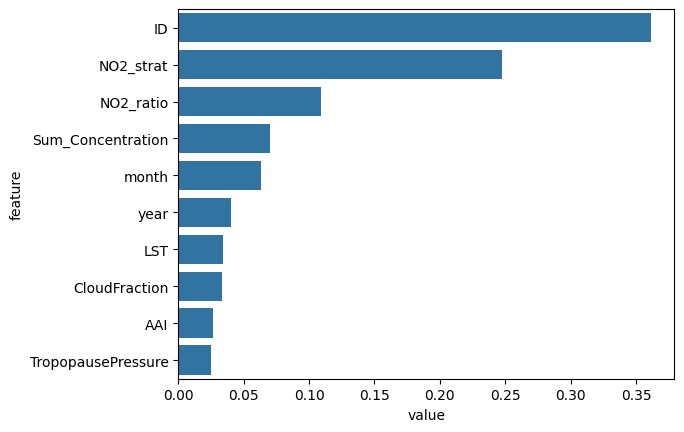

In [7]:
sns.barplot(data=perm_df[:10], x='value', y='feature');

- Для LightGBM наиболее важным оказался признак с номерами станций мониторинга качества воздуха

In [8]:
perm_cb = permutation_importance(cb_opt,
                                 X_test_ct,
                                 y_test_ct,
                                 random_state=RAND,
                                 n_repeats=N_REPEATS)

perm_df = pd.DataFrame({
    'feature': list(X_test_ct.columns),
    'value': perm_cb['importances_mean']
}).sort_values(by='value', ascending=False)

C:\Users\main6\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


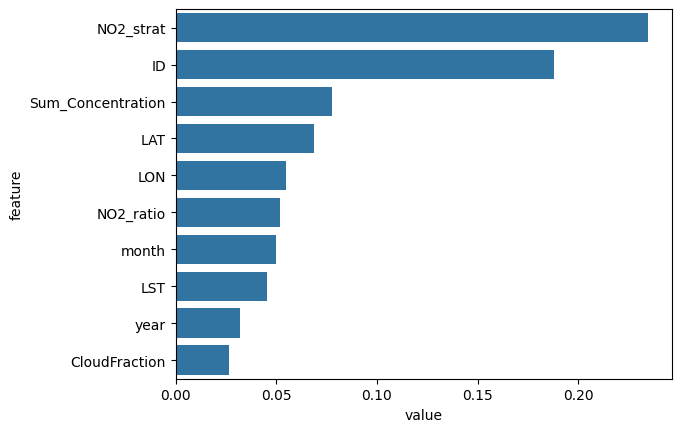

In [9]:
sns.barplot(data=perm_df[:10], x='value', y='feature');

- Для CatBoost номера станции на втором месте по значимости, на первом концентрация оксида азота в стратосфере

В целом тремя главными признаками являются:
- номер станции мониторинга воздуха
- концентрация вещества в стратосвере
- суммарная концентрация вещества

# Выводы

- В ходе работы был проведен разведочный анализ данных, произведена визулизация координат станций мониторинга оксида азота на карте, engineering признаков
- Подготовленные данные были обучены в разного рода моделях, таких как Линейная регрессия, Дерево решений, Случайный лес, три вида градиентных бустингов
- Предсказанные значения были оценены при помощи таблицы с метриками
- анализ важных признаков показал, что оценка наземной концентрации вредного оксида боллее всего зависит от самой станции мониторига, а так же от стратосферной концентрации, что указывает на связь озонового слоя и оксида азота 
- наилучшая модель LightGBM с подобранными параметрами